In [1]:
# Basic import
## plot within the notebook
%matplotlib inline
import warnings
import numpy as np
## No annoying warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as mpl

# Fit Gaia and Mock Data

The data file have been created by Jakob. We fit them with predifined model based on the `modefit` structure.


In [2]:
# - Main module
import simsurvey.calibration as a

In [3]:
# the model we are going to use here is the "ModelBasic"
mocktab = a.gaia_anchor.get_gaiafit("../data/mockdata/ztfsim_v0.dat", modelname="Basic")

In [4]:
mocktab.data.head()

,x,y,airmass,time,G_gaia,G_gaia_err,BP_gaia,BP_gaia_err,RP_gaia,RP_gaia_err,ZTF_filter,ZTF_mag,ZTF_mag_err,GPmBP_gaia,GPmBP_gaia_err,BPmRP_gaia,BPmRP_gaia_err
0,70.373428,132.887876,1.20973,0,14.691393,0.0014,14.858196,0.004,14.525357,0.004,g_ztf,15.110106,0.011000,-0.166803,0.004238,0.332839,0.005657
1,130.693402,26.885179,1.20973,0,13.964576,0.0014,14.128126,0.004,13.803073,0.004,g_ztf,14.391709,0.011000,-0.163550,0.004238,0.325053,0.005657
2,26.287306,167.984590,1.20973,0,13.809010,0.0014,14.018555,0.004,13.590918,0.004,g_ztf,14.289843,0.011000,-0.209545,0.004238,0.427638,0.005657
3,9.694224,17.503253,1.20973,0,15.684075,0.0014,15.774460,0.004,15.593425,0.005,g_ztf,16.009283,0.011356,-0.090386,0.004238,0.181035,0.006403
4,134.433610,47.299932,1.20973,0,15.944309,0.0014,15.827256,0.004,16.162759,0.005,g_ztf,15.970104,0.011000,0.117053,0.004238,-0.335503,0.006403


In [5]:
init = [1 for i in range(mocktab.model.nparam)]
err = [1 for i in range(mocktab.model.nparam)]
mocktab.run_mcmc(nrun=2000,init=init, init_err=err)

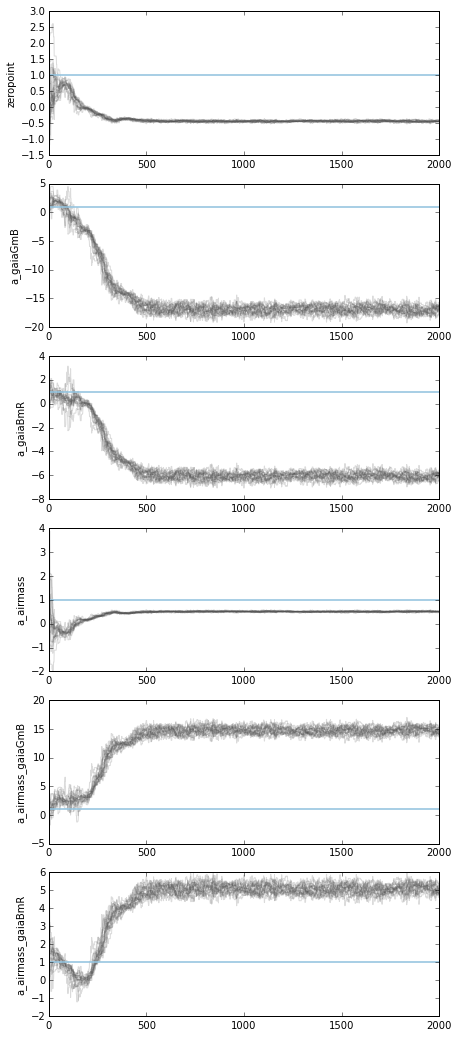

In [6]:
mocktab.show_mcmcwalkers()

In [7]:
mocktab.set_mcmc_burnin(750)

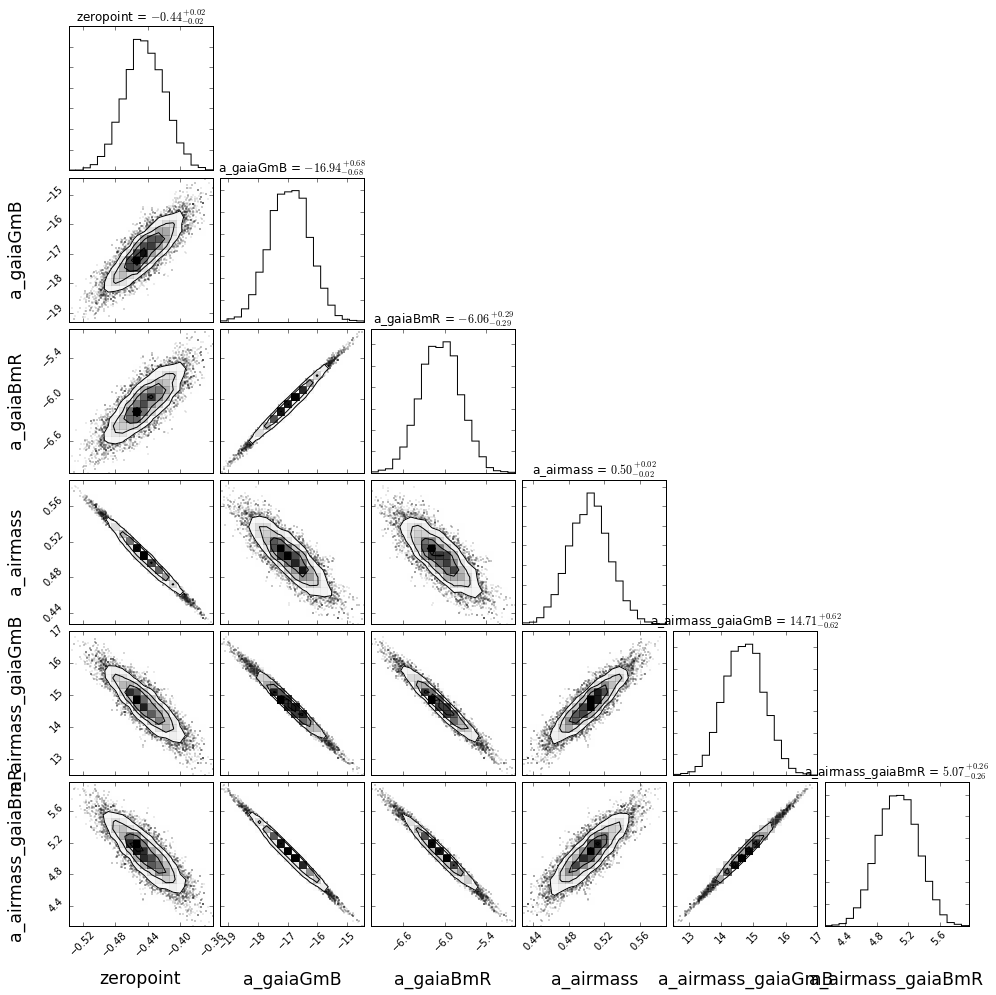

In [8]:
mocktab.show_mcmc_corner()

# Create a New model

This document comes from the gaia_anchor library

***
# Create a new Model.
## How to call it?
You can implement any model named e.g. ModelNewOne. This model will then
be accessible from the GaiaFitter using the keywork 'NewOne'. (`modelname='NewOne'`)


## What must be its structure?
There is only a few methods and parameter you need to implement:
* **`FREEPARAMETERS`** the list of name of *all* the parameters

* **`setup`** the methods that read the parameter for the model.
   Its argument must be `parameters`. It could be as simple as 
   ```python
   def setup(self,parameters):
      self._parameters = parameters
   ```
   Then, the current parameters values will be encoded in `self._parameters`
   
* **`get_loglikelihood`** the must return the loglikelihood (could be -0.5*chi2) of the
   model given the data (the parameters has been set to the model before).
   Its argument must be `data`: the `GaiaFitter.data`
   
* **`_minuit_chi2_`** a stupid function that explicitly takes in argument **all** the freeparameters. the function feed them to parameters and returns self.get_chi2(parameter). For example, if FREEPARAMETERS = ["a","b","toto"] then add this method:
  
  ```python
  def _minuit_chi2_(self,a,b,toto):
      parameter = a,b,toto
      return self.get_chi2(parameter)
   ```
   
[optional]
* **`lnprior`** (optional but better): method that measure the log of the prior
   value for the parameters. This methods could be as trivial as a flat
   'no-informatio' prior:
   ```python
   def lnprior(self,parameters):
       return 0
    ```
    
[optional]
* **`get_set_param_input`**: method with no argument that returns a dictionary
  containing part or the totality of the parameter fit properties:
   * x `_guess`
   * x `_boundaries`
   * x `_fixed`

  where x is any of the freeparameters.
  For example, if FREEPARAMETERS = ["a","b","toto"]
  and you know `b` have to be positive around, say 2, you could do somethings like:
  
  ```python
  def get_set_param_input(self):
      return {"b_guess":2,"b_boundaries":[0,None]}
  ```
  You can overwrite anything when calling the `fit()` method. Its kwargs does just so
  and overwrite anything returned by this default value setter.
  
## Done